<a href="https://colab.research.google.com/github/mint-rin/SeSAC/blob/main/CNN_1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

# 샘플 데이터 확인

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

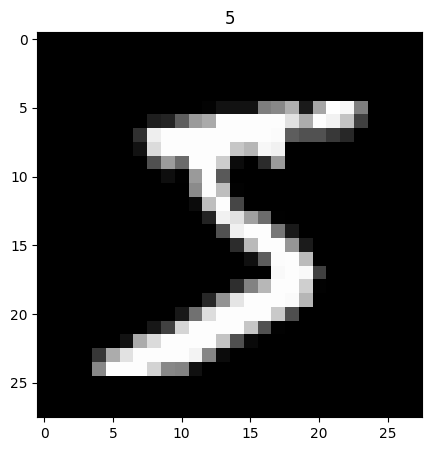

In [ ]:
import matplotlib.pyplot as plt

# 이미지 그릴 박스 크기 설정
fig, axes = plt.subplots(1, 1)
fig.set_size_inches(10, 5)

axes.imshow(x_train[0], cmap='gray')  # cmap='gray' 흑백 옵션
axes.set_title(str(y_train[0]))

plt.show()

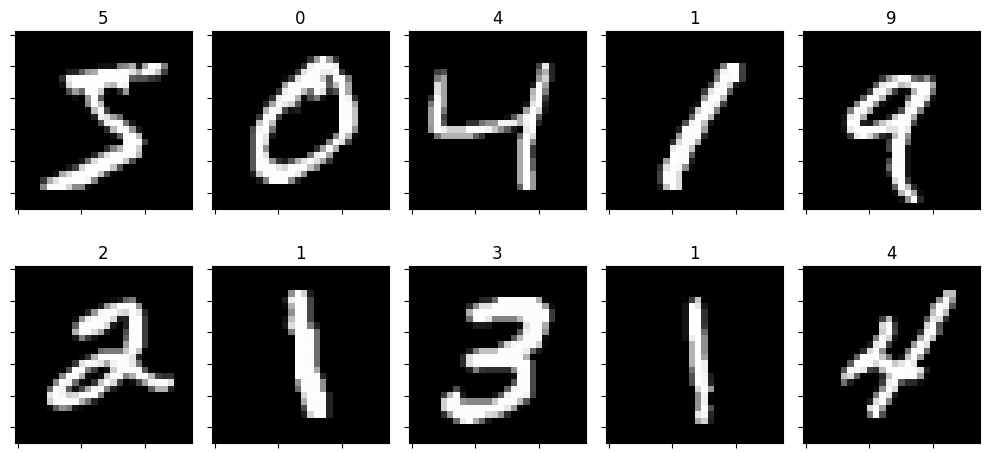

In [ ]:
import matplotlib.pyplot as plt

# 이미지 그릴 박스 크기 설정
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
  axes[i//5, i%5].imshow(x_train[i], cmap='gray')  # cmap='gray' 흑백 옵션
  axes[i//5, i%5].set_title(str(y_train[i]))
  plt.setp(axes[i//5, i%5].get_xticklabels(), visible=False)
  plt.setp(axes[i//5, i%5].get_yticklabels(), visible=False)

plt.tight_layout()  # 자동으로 여백 조정
plt.show()

# DNN으로 MNIST 구현

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
# 정규화
x_train = x_train/255.0
x_test = x_test/255.0
x_train[0]

# MNIST data는 각 픽셀이 0~255 사이의 정수값을 가진다.
# 이런 이미지의 경우, 보통 255로 나누어 0~1 사이의 값으로 정규화한다.
# 표준화는 아니지만, 양수값으로 이루어진 이미지 전처리(scaling)에 주로 사용되는 방법이다.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) # 0 ~ 9 로 카테고리가 총 10개

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.3068 - acc: 0.9135 - val_loss: 0.1682 - val_acc: 0.9496
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1438 - acc: 0.9575 - val_loss: 0.1212 - val_acc: 0.9625
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1042 - acc: 0.9695 - val_loss: 0.1152 - val_acc: 0.9641
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0817 - acc: 0.9764 - val_loss: 0.0992 - val_acc: 0.9693
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0682 - acc: 0.9799 - val_loss: 0.0906 - val_acc: 0.9729


In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest loss:',test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0906 - acc: 0.9729 - 960ms/epoch - 3ms/step

Test loss: 0.09055028110742569

Test accuracy: 0.9728999733924866


# CNN으로 MNIST 구현

In [ ]:
# tensorflow 내장 데이터인 MNIST 불러오기
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# 훈련 데이터 형태 확인
x_train.shape, y_train.shape

# (60000, 28, 28)
# 60,000개의 데이터가 (28, 28) 픽셀로 들어있음

((60000, 28, 28), (60000,))

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# data normalization
x_train = x_train.reshape(-1, 28, 28, 1)  # reshape(60000, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)    # reshape(10000, 28, 28, 1)

# 흑백이라 1을 넣음. 컬러면 3
# DNN은 1차원, CNN은 3차원이기 때문에 reshpe 함수로 형태를 바꿈.(색상 정보 추가)

In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

cnn = Sequential()

# Feature Extraction
cnn.add(layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))
cnn.add(layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))

# Classification
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dropout(0.25))
cnn.add(layers.Dense(10, activation='softmax'))

In [ ]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), metrics = ['acc'])

In [ ]:
result = cnn.fit(x_train, y_train, epochs = 5, batch_size = 128, validation_data = (x_test, y_test))

Epoch 1/5
469/469 [==============================] - 9s 6ms/step - loss: 0.4098 - acc: 0.8695 - val_loss: 0.0881 - val_acc: 0.9703
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0994 - acc: 0.9695 - val_loss: 0.0565 - val_acc: 0.9816
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0716 - acc: 0.9778 - val_loss: 0.0484 - val_acc: 0.9847
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0574 - acc: 0.9825 - val_loss: 0.0572 - val_acc: 0.9816
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0492 - acc: 0.9841 - val_loss: 0.0334 - val_acc: 0.9890


In [ ]:
test_result = cnn.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0334 - acc: 0.9890
test loss:  0.033432863652706146
test acc:  0.9890000224113464
